<a href="https://colab.research.google.com/github/fikaasn/EDA-with-Python/blob/main/EDA_Cocooncenter_pharmacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read data
df = pd.read_csv('/content/gdrive/MyDrive/Data Analysis/Coco_pharmacy.csv', delimiter=';')

## 1. Missing Value Check and Handling

In [ ]:
# Print 5 data samples
df.sample(5)

,EAN_code,product_cat,brand,form,price,description,num_review,overall_rate,overall_prod_qual,customer_id,...,gender,customer_loc,cus_rev_num,review_vote,customer_rate,product_qual,recommend,head_review,body_review,review_date
413,3401326306048,Body Moisturisers,Bioderma,Cream,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Una T.,...,female,"Riga, Latvia",5,0,5,not available,not available,available,excelent body cream without parabens anti aler...,4 years ago
887,3700281702293,Body Moisturisers,Topicrem,Milk,16.5,Topicrem UH Body Milk 2 x 500ml,295,4.9,4.9,Pleshivtceva O.,...,female,London,4,0,5,not available,not available,available,ideal tool dry dry skin,6 years ago
1513,3661434006968,Body Soothing Products,Uriage,Balm,18.9,Uriage Xémose Anti-Itch Soothing Oil Balm 500ml,2,5.0,5.0,Emilie,...,female,Toronto,1,0,5,5,yes,good,sensitive skin nature pregnant belly really it...,6 months ago
1293,3264680009761,Body Dry Oils,Nuxe,Oil,12.3,Nuxe Huile Prodigieuse Multi-Purpose Dry Oil 50ml,27,4.9,4.8,Waterhouse S.,...,female,indonesia,2,4,5,not available,not available,available,bought use skin body dry sensitive skin often ...,2 years ago
405,3401326306048,Body Moisturisers,Bioderma,Cream,19.9,Bioderma Atoderm Ultra Nourishing Cream 2 x 500ml,507,4.8,4.9,Joka Brkljacic V.,...,female,indonesia,1,0,5,not available,not available,available,high quality product,4 years ago


In [ ]:
# Simple data checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EAN_code           1539 non-null   int64  
 1   product_cat        1539 non-null   object 
 2   brand              1539 non-null   object 
 3   form               1539 non-null   object 
 4   price              1539 non-null   float64
 5   description        1539 non-null   object 
 6   num_review         1539 non-null   int64  
 7   overall_rate       1539 non-null   float64
 8   overall_prod_qual  1539 non-null   object 
 9   customer_id        1539 non-null   object 
 10  age_group          1539 non-null   object 
 11  gender             1539 non-null   object 
 12  customer_loc       1539 non-null   object 
 13  cus_rev_num        1539 non-null   int64  
 14  review_vote        1539 non-null   int64  
 15  customer_rate      1539 non-null   int64  
 16  product_qual       1539 

*In the data, there are 22 columns and 1539 rows. There are no missing values.*

In [ ]:
# check missing values
df.isna().sum()

EAN_code             0
product_cat          0
brand                0
form                 0
price                0
description          0
num_review           0
overall_rate         0
overall_prod_qual    0
customer_id          0
age_group            0
gender               0
customer_loc         0
cus_rev_num          0
review_vote          0
customer_rate        0
product_qual         0
recommend            0
head_review          0
body_review          0
review_date          0
dtype: int64

## 2. Duplicated Value Check and Handling

*The step of checking for duplicates or removing duplicates is skipped because the available data lacks a primary key or unique column that can be used as a reference to identify duplicate, and continued with removing unnecessary columns.*

In [ ]:
#remove unnecessary columns
unnecessary_columns = ['description', 'num_review', 'overall_prod_qual', 'customer_id','cus_rev_num', 'review_vote','customer_rate',
                       'product_qual','recommend', 'head_review', 'body_review', 'review_date']
df = df.drop(unnecessary_columns, axis=1)

In [ ]:
#data checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EAN_code      1539 non-null   int64  
 1   product_cat   1539 non-null   object 
 2   brand         1539 non-null   object 
 3   form          1539 non-null   object 
 4   price         1539 non-null   float64
 5   overall_rate  1539 non-null   float64
 6   age_group     1539 non-null   object 
 7   gender        1539 non-null   object 
 8   customer_loc  1539 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 108.3+ KB


## 3. Inconsistent Casing Check and Handling

In [ ]:
# print Number of categories in 'customer_loc' column
numb_of_ctg = df['customer_loc'].nunique()
print("\nNumber of categories in 'customer_loc' column:", numb_of_ctg)

# print List of categories in 'customer_loc' column
list_of_ctg = df['customer_loc'].unique()
print("\nList of categories in 'customer_loc' column:", list_of_ctg)


Number of categories in 'customer_loc' column: 196

List of categories in 'customer_loc' column: ['  SAUDI ARABIA  ' '  Saudi Arabia  ' '  Riga, Latvia  ' '  UK  '
 '  Bahrain  ' '  Kingston  ' '  Oman  ' '  Newcastle  ' '  London  '
 '  Omireen  ' '  Saudi arabia riyadh  ' '  UAE  ' '  riyadh  '
 '  Coventry uk  ' '  Saudia  ' '  Saudi Arabia - Medina  '
 '  Riyadh, Saudi Arabia  ' '  KSA  ' '  Newcastle upon Tyne  ' '  SA  '
 '  Ksa  ' '  EU  ' '  Saudi arabi  ' '  ksa Riyadh  ' '  ksa  '
 '  Saudi - Madina  ' '  Southampton  ' '  Birmingham, West Midlands  '
 '  Kent  ' '  SAUDIA ARIBIA  ' '  United Arab Emirates  '
 '  KSA Middle East  ' '  Lebao  ' '  Riyadh  ' '  saudi arabia  '
 '  Awali  ' '  Saudi  ' '  Tilbury, Essex  ' '  The kingdom  '
 '  Kingdom of Saudi Arabia  ' '  Dartmoor  ' '  SAUDIA ARABIA  '
 '  GLASGOW  ' '  Saudi-Arabia  ' '  Hertfordshire  ' '  Colorado, USA  '
 '  London ,Feltham  ' '  Stoke on Trent  ' '  Hail, Saudi Arabia  '
 '  Eesti  ' '  Saudi arabia  ' 

In [ ]:
# Convert to lowercase and remove extra spaces
df['customer_loc'] = df['customer_loc'].str.lower().str.strip()

In [ ]:
# Sorting and obtaining a list of unique categories alphabetically.
list_customer_loc = df['customer_loc'].sort_values().unique().tolist()

# Displaying a list of categories alphabetically.
print("List of Customer Locations Alphabetically.:")
print(list_customer_loc)

List of Customer Locations Alphabetically.:
['abu dhabi', 'ahssa', 'alfreton', 'armenia', 'ash md', 'ashchurch', 'ashford, kent', 'awali', 'bahrain', 'besh', 'birmingham, west midlands', 'blackmoor, liss', 'bolton', 'bolton, uk', 'bridlington', 'brighton', 'bristol', 'burgess hill', 'cambridge', 'cardiff', 'carterton', 'cheshire', 'chester', 'chester, cheshire', 'colchester', 'colorado, usa', 'cork', 'cork, ireland', 'cotswolds', 'coventry uk', 'croatia', 'dagenham', 'dartmoor', 'derby, east midlands', 'devon', 'donaghadee', 'dubai', 'dublin', 'dunbar', 'dundee scotland', 'east of england', 'edinburgh', 'eesti', 'egham , surrey', 'essex', 'estonia', 'eu', 'frank', 'gb', 'gerrards cross', 'glasgow', 'glasgow, scotland', 'gloucester', 'gloucestershire', 'hail, saudi arabia', 'harlow', 'harrow london', 'hartlepool', 'hastings', 'hertfordshire', 'high wycombe', 'hong kong', 'hongkong', 'honley', 'indonesia', 'israel', 'jeddah', 'jeddah saudi arabia', 'kent', 'kent england', 'kettering', 'k

In [ ]:
# Creating a dictionary for mapping replacement
category_mapping = {
    'bolton, uk': 'bolton',
    'chester': 'chesire',
    'chester, cheshire': 'chesire',
    'cork, ireland': 'cork',
    'uae' : 'united arab emirates',
    'sa': 'saudi arabia',
    'london ok': 'london',
    'gb': 'london',
    'uk': 'london',
    'united kingdom' : 'london',
    'london ,feltham' : 'london',
    'السعودية' : 'saudi arabia',
    'السعوديه': 'saudi arabia',
    'الشرقية' : 'saudi arabia',
    'london heathrow' : 'london',
    'london o' : 'london',
    'margate, kent south east uk' : 'london',
    'glasgow, scotland' : 'glasgow',
    'saudia' : 'saudi arabia',
    'saudia arabia' : 'saudi arabia',
    'saudia aribia' : 'saudi arabia',
    'the kingdom' : 'london',
    'saudi' : 'saudi arabia',
    'saudi - madina' : 'saudi arabia',
    'saudi arabi' : 'saudi arabia',
    'saudi arabia - jeddah' : 'saudi arabia',
    'saudi arabia - medina' :'saudi arabia',
    'saudi arabia riyadh' : 'saudi arabia',
    'saudi arabis' : 'saudi arabia',
    'saudi ariba' : 'saudi arabia',
    'saudi-arabia' : 'saudi arabia',
    'riyadh' : 'saudi arabia',
    'riyadh , saudi arabia' : 'saudi arabia',
    'riyadh, s. a.' : 'saudi arabia',
    'riyadh, saudi arabia' : 'saudi arabia',
    'sa' :'saudi arabia',
    'hail, saudi arabia' : 'saudi arabia',
    'jeddah saudi arabia' : 'saudi arabia',
    'kingdom of saudi arabia' : 'saudi arabia',
    'ksa' : 'saudi arabia',
    'ksa middle east' : 'saudi arabia',
    'ksa riyadh' : 'saudi arabia',
    'hong kong' : 'hongkong',
    'jeddah' : 'saudi arabia',
    'kent' : 'london',
    'kent england' : 'london',
    'lancashire, accrington': 'lancashire',
    'port glasgow' :'glasgow'}

# Using replace with the mapping dictionary
df['customer_loc'] = df['customer_loc'].replace(category_mapping)

In [ ]:
# print Number of categories in 'customer_loc' column
numb_of_ctg = df['customer_loc'].nunique()
print("\nNumber of categories in 'customer_loc' column:", numb_of_ctg)


Number of categories in 'customer_loc' column: 133


## 4. Statistical Summaries of Columns

In [ ]:
# Grouping columns by data category
categoricals = ['product_cat', 'brand', 'form', 'age_group','gender', 'customer_loc']
numericals = ['price', 'overall_rate']

In [ ]:
# numerical statistical summary
df[numericals].describe()

,price,overall_rate
count,1539.000000,1539.000000
mean,16.993379,4.770760
std,4.677627,0.194602
min,3.200000,2.800000
25%,14.500000,4.800000
50%,16.500000,4.800000
75%,19.900000,4.900000
max,34.500000,5.000000


*Findings :*

*1.* *The average 'price' is around 16.99 with a standard deviation of about 4.68, indicating a fairly large variation.*

*2.* *The average 'overall_rate' is about 4.77 with a standard deviation of about 0.19, showing a smaller variation.*

*3.* *The 'price' distribution appears quite even with a significant difference between the first and third quartiles.*

*4.* *The 'overall_rate' tend to be stable with a median and quartiles that are almost the same.*

In [ ]:
# describe method on categorical data
df[categoricals].describe()

,product_cat,brand,form,age_group,gender,customer_loc
count,1539,1539,1539,1539,1539,1539
unique,11,26,7,8,2,133
top,Body Moisturisers,Bioderma,Cream,25-34,female,indonesia
freq,1067,602,737,726,1314,436


*Findings :*

*Most of them have research experience.*

## 5. Univariate Analysis

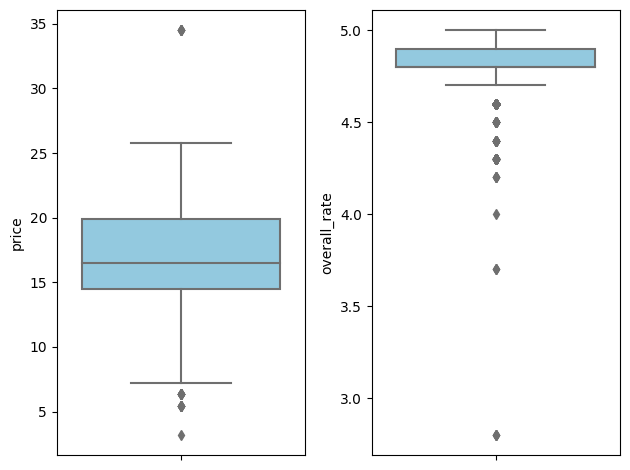

In [ ]:
# Boxplot to detect outliers
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

*Findings :*

*There is an outlier in the 'price' column and 'overall_rate' column.*

<Figure size 1200x500 with 0 Axes>

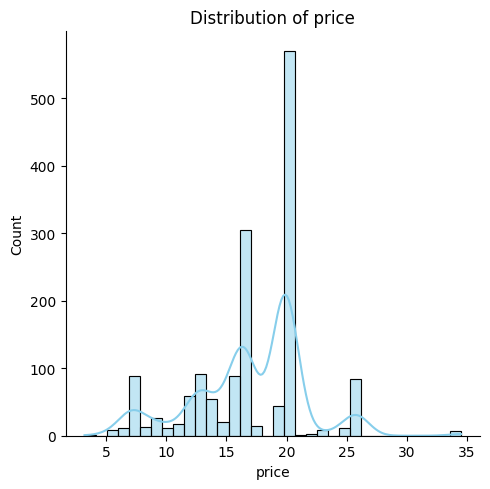

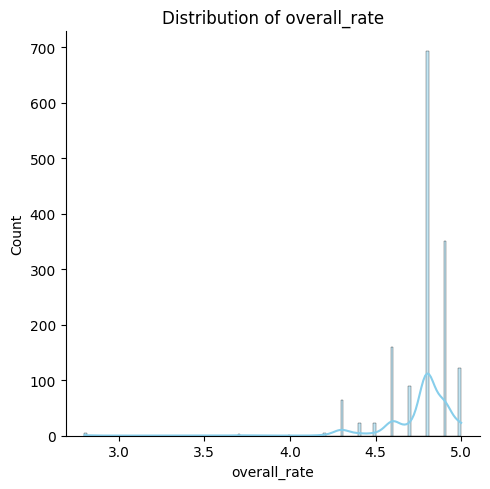

In [ ]:
features = numericals

# Set the figure size
plt.figure(figsize=(12, 5))

# Iterate through numerical features
for index, feature in enumerate(features):

    # Using displot for distribution plot
    sns.displot(x=df[feature], color='skyblue', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

    plt.tight_layout()

# Show the plots
plt.show()

*Findings :*

*1.* *The 'price' column has a symmetrical distribution.*

*2.* *The 'overall_rate' column has a long tail on the left side, with most values located to the right of the median (skewness < 0), indicating a left-skewed (negatively skewed) distribution.*

## 6. Bivariate Analysis

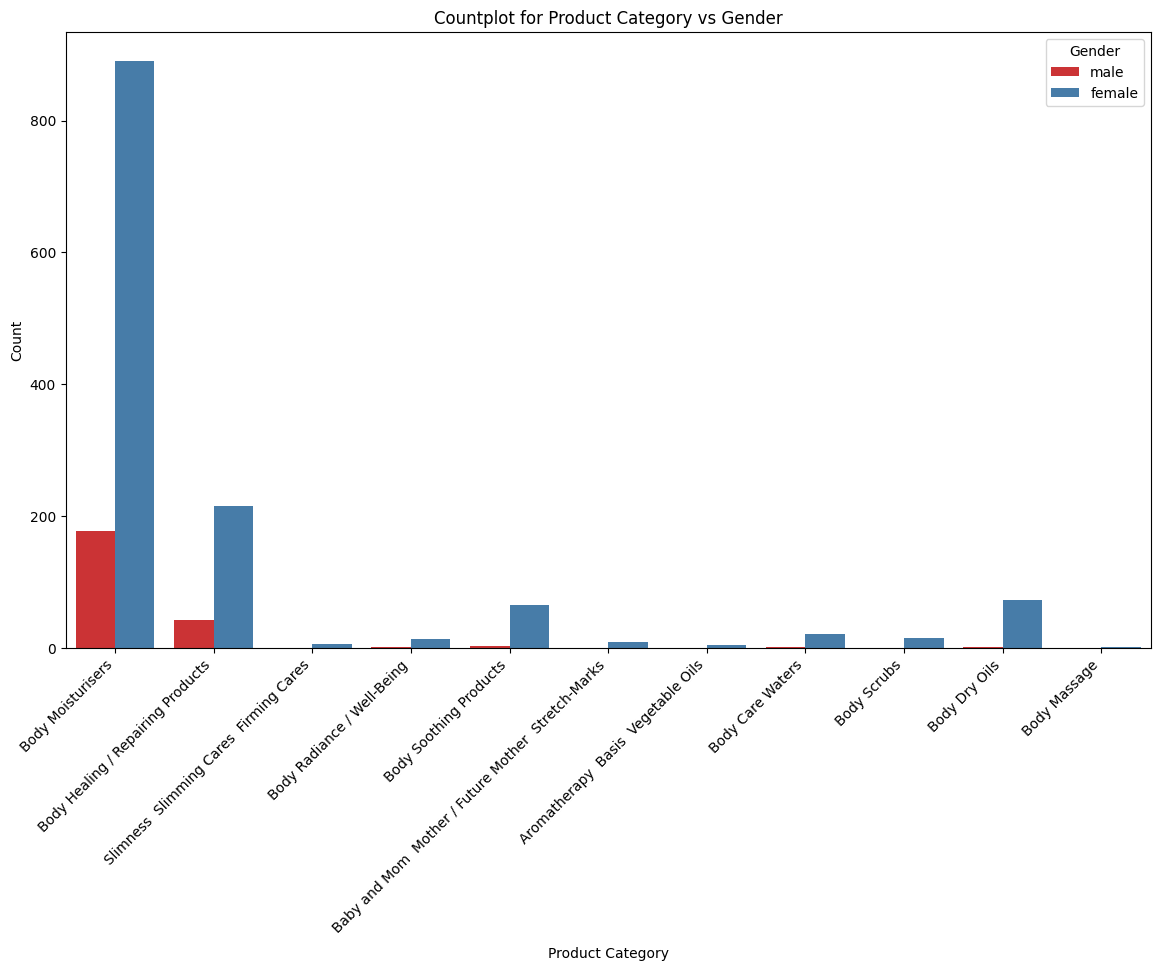

In [ ]:
# Countplot for Product Category vs Gender
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='product_cat', hue='gender', palette='Set1')
plt.title('Countplot for Product Category vs Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x untuk meningkatkan kejelasan
plt.show()

*Findings :*

*For overall product categories, there is a difference in purchasing interest. Individuals with a female gender show a higher purchasing tendency compared to males. The difference is particularly significant, especially for products in the 'body moisturizer' category.*

<Axes: >

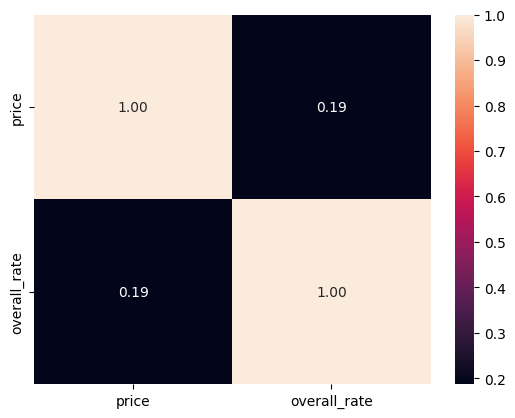

In [ ]:
# Calculating the correlation between columns in the data
numeric_columns = ['price', 'overall_rate']
numeric_df = df[numeric_columns]

# Menghitung korelasi hanya untuk kolom-kolom numerik
correlation = numeric_df.corr()

# Creating a correlation heatmap with annotations and a two-decimal format
sns.heatmap(correlation, annot=True, fmt='.2f')

*Findings :*

*A correlation close to 0 indicates a weak correlation between two variables. Changes in 'price' are not linearly correlated with changes in 'overall_rate'. Despite a positive correlation (overall values tend to increase with increasing prices) as indicated by the positive sign, the value is still low, so we cannot say that the correlation between the two is very strong.*

## 7. Overall Summary

*Findings :*

*1.* *The data doesn't have significant issues that require in-depth handling, there is only inconsistent casing in the 'customer_loc' column, and it has already been resolved.*

*2.* *The minimum and maximum values are reasonable for each column.*

*3.* *The 'price' column displays a symmetrical distribution, while the 'overall_rate' column is left-skewed with an outlier in both columns.*

*4.* *Across product categories, there is a gender-based difference in purchasing interest, with females showing a higher tendency, particularly for 'body moisturizer' products.*

*5.* *There is a weak correlation between 'price' and 'overall_rate' suggesting a non-linear relationship between the two. However, this does not indicate a cause-and-effect relationship or a causal connection because, despite the low correlation, there may still be a non-linear relationship or other factors influencing the association between price and overall rating.*